<a href="https://colab.research.google.com/github/rzsun/practical-deep-learning-hw/blob/main/lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai duckduckgo_search

In [4]:
from duckduckgo_search import ddg_images
from fastai.vision.all import *
from fastcore.all import *
from time import sleep

path = Path('lesson1')

def search_images(term, max_results=50):
  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results=max_results)).itemgot('image')

def save_images(term):
  dest = (path/term)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{term} photo'))
  resize_images(path/term, max_size=400, dest=path/term)

In [5]:
save_images("shanghai")
sleep(5)
save_images("new york")

Searching for 'shanghai photo'
Searching for 'new york photo'


In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

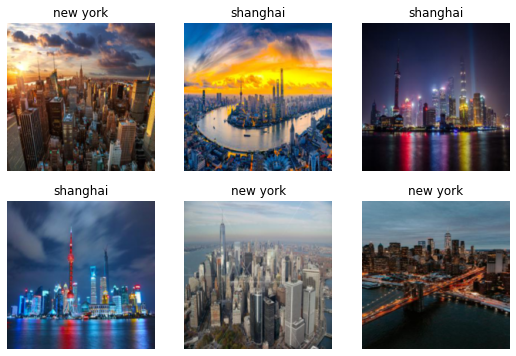

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.240093,2.248076,0.444444,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.926177,1.559232,0.444444,00:16
1,0.706125,0.854923,0.388889,00:17
2,0.548494,0.534262,0.277778,00:16


In [14]:
predict_term = 'manhattan photos'
urls = search_images(predict_term, max_results=1)

from fastdownload import download_url
dest = f"{predict_term}.jpg"
download_url(urls[0], dest, show_progress=False)

Searching for 'manhattan photos'


Path('manhattan photos.jpg')

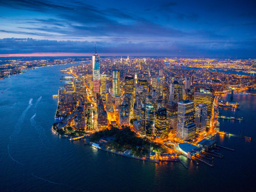

In [15]:
im = Image.open(dest)
im.to_thumb(256,256)

In [16]:
result, _, probs = learn.predict(PILImage.create(dest))
print(f"This is: {result}.")
print(f"Probability it's a {result}: {probs[0]:.4f}")

This is: new york.
Probability it's a new york: 0.9816
